<a href="https://colab.research.google.com/github/AlexeyRogS/cv_course/blob/week2/week2/ml_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# План занятия

## Немного истории:
* Наш мозг vs искусственная нейронная сеть
* Перцептрон Розенблатта

## Задача классификации:
* Постановка задачи
* Линейный классификатор
* Linear regression
* Softmax

## Функция ошибки (потерь):
* MSE
* Softmax
* Cross Entropy Loss

## Обучающая выборка:
* Разделение на тренировочную и тестовую выборку

## Многослойные нейронные сети:
* Функция активации

## Оптимизация:
* Градиенты
* Граф вычислений и цепное правило
* Градиентный спуск





---

## Немного истории

* В 1943 году Уоррен Мак-Каллок и Уолтер Питтс предложили понятие [искусственной нейронной сети](https://ru.wikipedia.org/wiki/%D0%9D%D0%B5%D0%B9%D1%80%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%81%D0%B5%D1%82%D1%8C). В том числе введено понятие [искусственного нейрона](https://ru.wikipedia.org/wiki/%D0%98%D1%81%D0%BA%D1%83%D1%81%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D1%8B%D0%B9_%D0%BD%D0%B5%D0%B9%D1%80%D0%BE%D0%BD).
* В 1950 году [Алан Тьюринг](https://ru.wikipedia.org/wiki/%D0%A2%D1%8C%D1%8E%D1%80%D0%B8%D0%BD%D0%B3,_%D0%90%D0%BB%D0%B0%D0%BD) предложил [тест Тьюригна](https://ru.wikipedia.org/wiki/%D0%A2%D0%B5%D1%81%D1%82_%D0%A2%D1%8C%D1%8E%D1%80%D0%B8%D0%BD%D0%B3%D0%B0) для оценки интеллекта компьютера.

* В 1957 [Фрэнк Розенблатт](https://ru.wikipedia.org/wiki/%D0%A0%D0%BE%D0%B7%D0%B5%D0%BD%D0%B1%D0%BB%D0%B0%D1%82%D1%82,_%D0%A4%D1%80%D1%8D%D0%BD%D0%BA) придумал [Перцептрон](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D1%86%D0%B5%D0%BF%D1%82%D1%80%D0%BE%D0%BD) и создал первый нейрокомпьютер [«Марк-1»](https://ru.wikipedia.org/wiki/%D0%9C%D0%B0%D1%80%D0%BA-1). Перцептрон часто путают с однослойной линейной моделью. Но это не совсем одно и то же.

...

* Закладываются основы современных нейронных сетей. Взлеты и падения интереса к машинному обучению.

...

* 1997 г. Компьютер [Deep Blue](https://ru.wikipedia.org/wiki/Deep_Blue) обыграл чемпиона мира по шахматам Гарри Каспарова.

...

* 2012 г. Сеть [AlexNet](https://en.wikipedia.org/wiki/AlexNet) с большим отрывом выиграла конкурс по распознаванию изображений ImageNet LSVRC-2012.

...

* 2022 г. Нейросети повсюду...



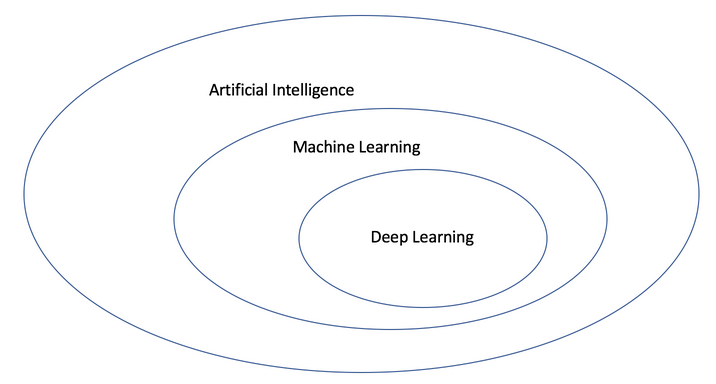

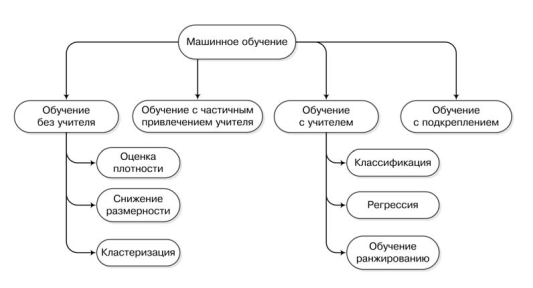

Компьютерная программа обучается по мере накопления опыта относительно некоторого класса задач T и целевой функции P , если качество решения этих задач (относительно P ) улучшается с получением нового опыта.


При обучении с учителем на вход подается набор тренировочных примеров, который обычно называют обучающим или тренировочным набором данных (training set или training sample — тренировочная выборка), и задача состоит в том, чтобы продолжить уже известные ответы на новый опыт, выраженный обычно в виде тестового набора данных. Основное предположение здесь в том, что данные, доступные для обучения, будут чем-то похожи на данные, на которых потом придется применять обученную модель, иначе никакое обобщение будет невозможно.

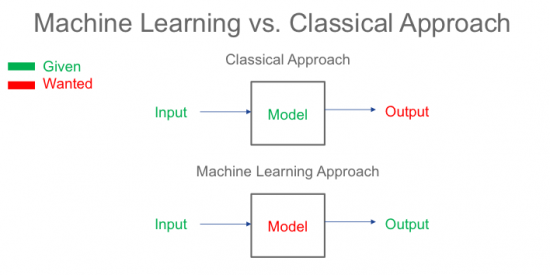

### Наш мозг не нейронная сеть

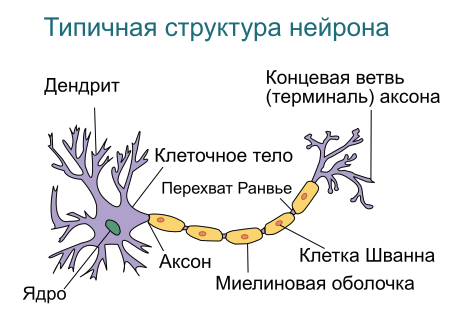

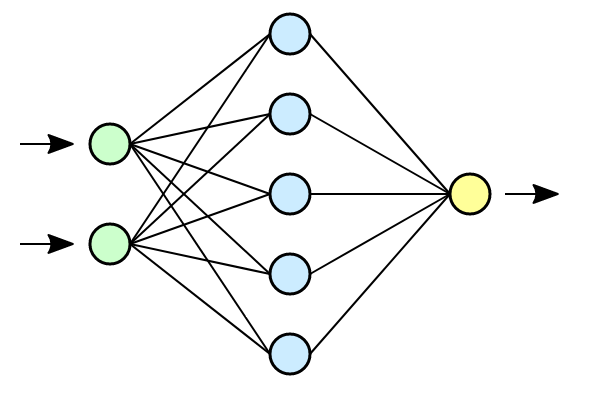

## Линейная регрессия

Обычный пример задачи регрессии: по параметрам недвижимости (местоположение, метраж, близость к метро, дата застройки и другие) оценить ее стоимость.

Линейная регрессия это математическая модель, которая аппроксимирует целевую зависимость линейной комбинацией входных параметров.

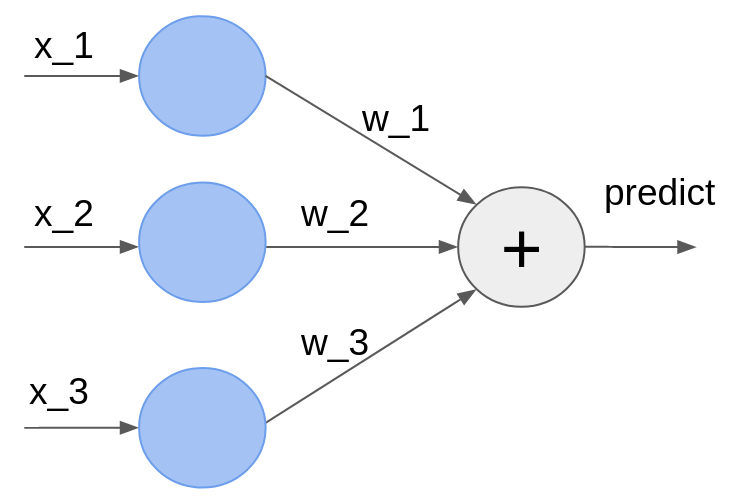

Математически мы  можем это записать следующим образом (для одного объекта с параметрами $x_1, x_2, x_3$)

$$ predict = w_1 * x_1 + w_2 * x_2 + w_3 * x_3 = \mathbb{W}^{\text{T}}\mathbb{x} $$

При этом часто важно иметь в виду вероятностную картину регрессии: пусть истинное значение целевой переменной связано с параметрами следующим образом:

$$y = f(\mathbb{x}) + \epsilon$$

Оказывается, что если шум $\epsilon \text{~} \mathbb{N}(0, 1)$ то оптимальные веса линейной регрессии с точки зрения максимизации правдоподобия лейблов $y$ совпадают с полученными с помощью MSE:

$$\hat{p}(y_{i}) = \mathbb{N}(\mathbb{W}^{\text{T}}x_{i},1)$$
$$\prod_{i}\hat{p}(y_{i})→\max_{\mathbb{W}}\iff\log\prod_{i}\hat{p}(y_{i})→\max_{\mathbb{W}}$$
$$\sum_{i}\hat{p}(y_{i})=\sum_{i}\frac{1}{\sigma\sqrt{2\pi}}\exp({-\frac{1}{2}}(\frac{y_{i}-\mathbb{W}^{\text{T}}x_{i}}{\sigma})^{2})$$
$$\log\prod_{i}\hat{p}(y_{i})\text{~}\sum_{i}(y_{i}-\mathbb{W}^{\text{T}}x_{i})^{2}→\min_{\mathbb{W}}$$

Оказывается, что также MSE имеет простое аналитическое решение:

$$\text{MSE}=\sum_{i}(y_{i}-\mathbb{W}^{\text{T}}x_{i})^{2}=||\mathbb{y}-\mathbb{X}\mathbb{W}||^{2}\rightarrow \min_{\mathbb{W}}$$
\begin{equation}
    \begin{cases}
      \frac{∂}{∂\mathbb{W}}\text{MSE} = 0\\
      \frac{∂^{2}}{∂\mathbb{W}^{2}}\text{MSE} > 0 \quad (positive definite)
    \end{cases}
\end{equation}

$$\frac{∂}{∂\mathbb{W}}\text{MSE}=\frac{∂}{∂\mathbb{W}}(\mathbb{y}-\mathbb{X}\mathbb{W})^{\text{T}}(\mathbb{y}-\mathbb{X}\mathbb{W})=-2\mathbb{X}^{\text{T}}(y-\mathbb{X}\mathbb{W})=-2(\mathbb{X}^{\text{T}}y-\mathbb{X}^{\text{T}}\mathbb{X}\mathbb{W})=0$$
$$\mathbb{X}^{\text{T}}\mathbb{X}\mathbb{W}=\mathbb{X}^{\text{T}}y$$
$$$$$$$$
$$\mathbb{W}=(\mathbb{X}^{\text{T}}\mathbb{X})^{-1}\mathbb{X}^{\text{T}}y$$
$$\frac{∂^{2}}{∂\mathbb{W}^{2}}\text{MSE} = 2\mathbb{X}^{\text{T}}\mathbb{X}$$
$$v\neq \mathbb{0} ⇒ v^{\text{T}}\mathbb{X}^{\text{T}}\mathbb{X}v=(\mathbb{X}v)^{\text{T}}\mathbb{X}v=||\mathbb{X}v||^{2} \geq 0 \quad \text{если столбцы  } \mathbb{X} \text{  линейно независимы}$$

$$\mathbb{X} = \begin{bmatrix}
    1 & x_{11} & x_{12} & x_{13} & \dots & x_{1n} \\
    1 & x_{21} & x_{22} & x_{23} & \dots & x_{2n} \\
    &&&&\dots \\
    1 & x_{d1} & x_{d2} & x_{d3} & \dots & x_{dn}
\end{bmatrix}
\quad
\mathbb{W} = \begin{bmatrix}
    w_0\\
    w_1\\
    \dots\\
    w_n
\end{bmatrix}
$$

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
w = np.array([0.3])
b = 2
X = np.linspace(0, 10, 100)
X = X[:,None]
y = X@w + b + np.random.randn(X.shape[0]) / 3
X_ = np.concatenate([np.ones(X.shape[0])[:,None], X], axis=1)
w_ = (np.linalg.inv((X_.T@X_)) @ X_.T) @ y

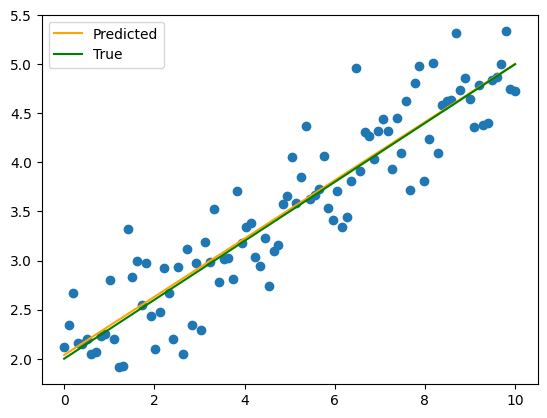

In [79]:
plt.scatter(X[:,0], y)
plt.plot(X[:,0], X_@w_, label='Predicted', c='orange')
plt.plot(X[:,0], X@w + b, label='True', c='green')
plt.legend()
plt.show()

### Классификация и визуализация

Посмотрим на это с геометрической точки зрения. Вспомним уравнение прямой:

$$ A \cdot x + B \cdot y + C = 0$$

$$ A \cdot x + B \cdot y = 0$$


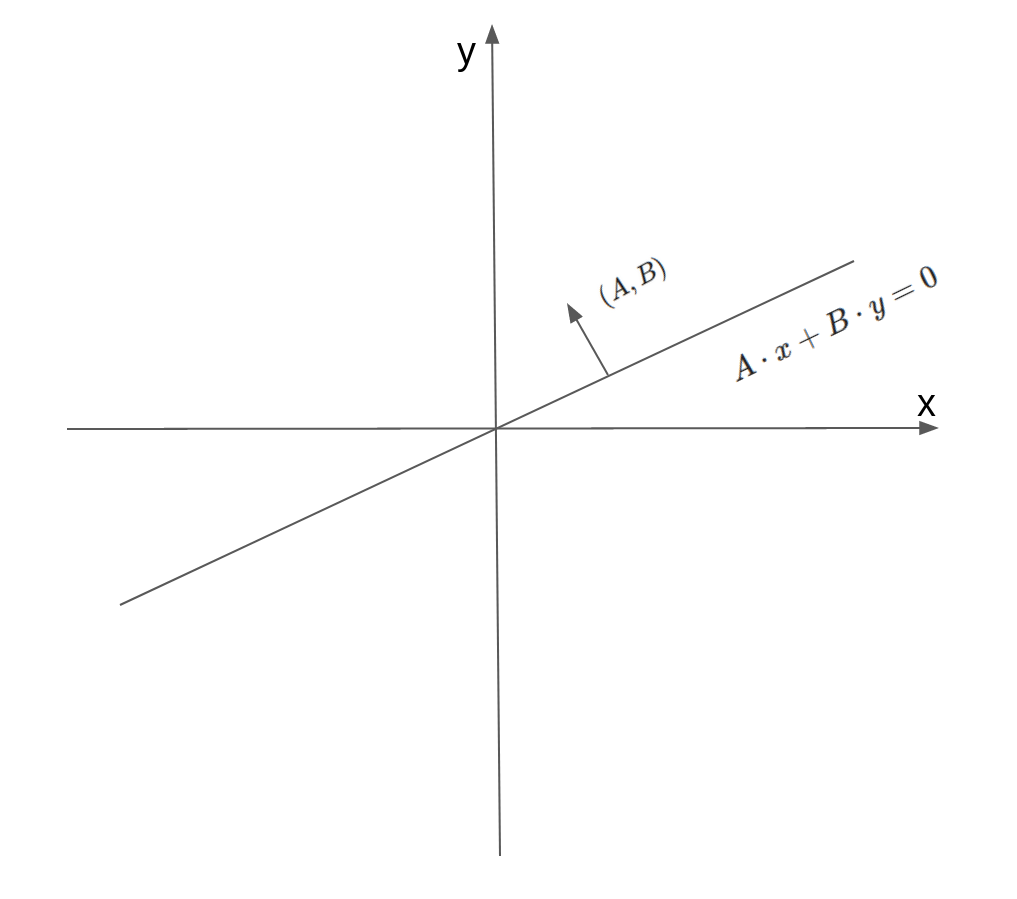

Чем же нам тут может быть полезно уравнение прямой? Мы вообще говорили про классификацию. Давайте теперь добавим немного данных!

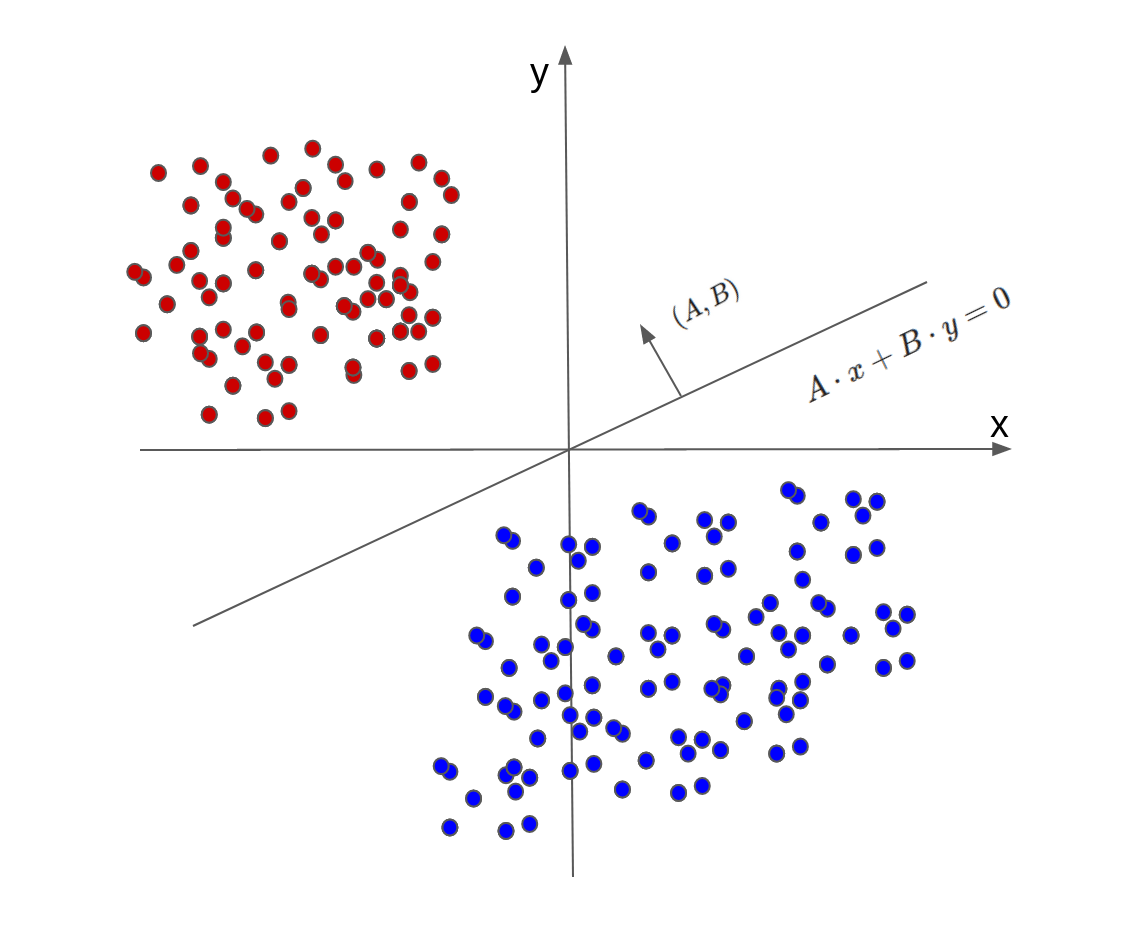

Теперь мы можем заметить, что если мы можем провести такую линию, чтобы данные, относящиеся к одному классу лежали сверху линии, а другого -- снизу, то мы можем классифицировать эти данные при помощи уравнения прямой!

Таким образом мы можем поменять наш нейрон, добавив ему на выход пороговую функцию, например, $ sign(x) $.



Но при такой постановке задачи у нас линия может проходить только через центр координат. Но данные могут располагаться как угодно. Давайте вернем обратно параметр $C$.

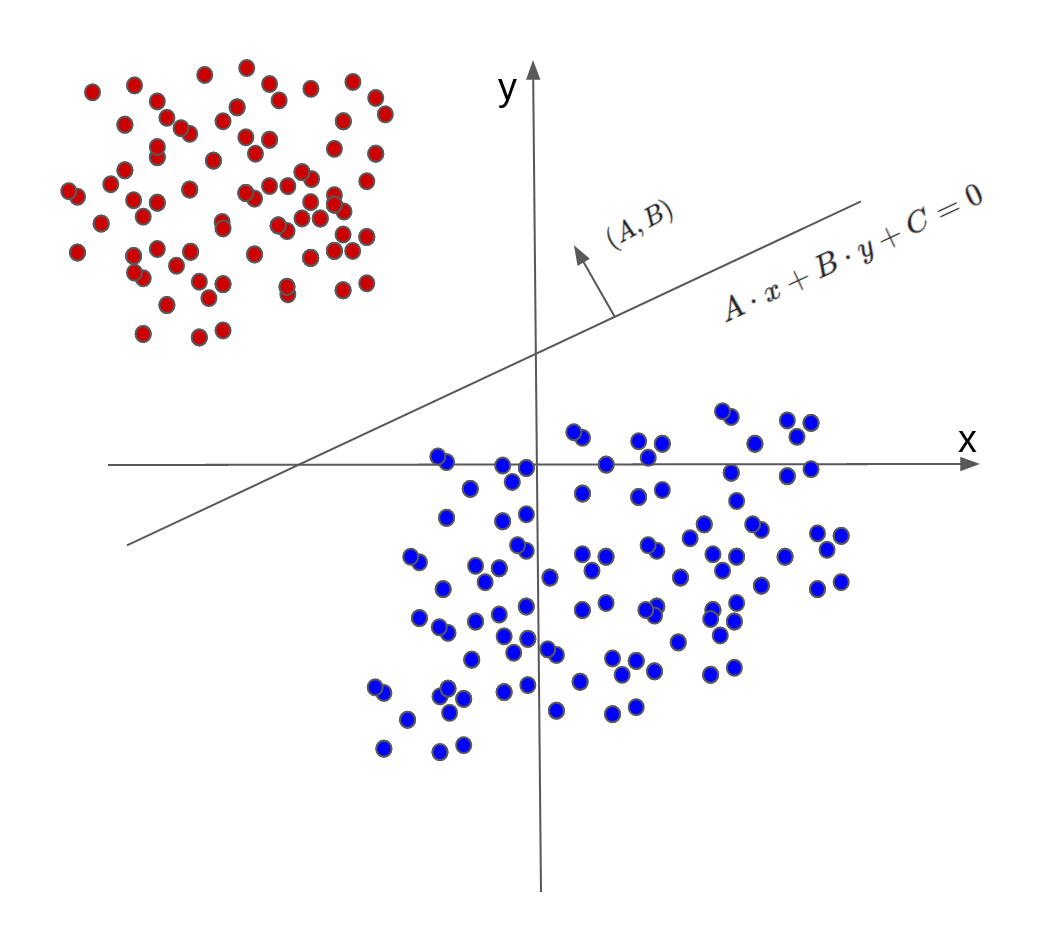

Теперь все отлично, если данные линейно разделимы, то мы можем найти такие числа $A$, $B$, и $C$, чтобы линия оптимально разделяла два множества данных. Вернемся к нашему нейрону. Давайте добавим недостающие части: скаляр для смещения и функцию $sign(x)$. (Вообще говоря, не обязательно ее).

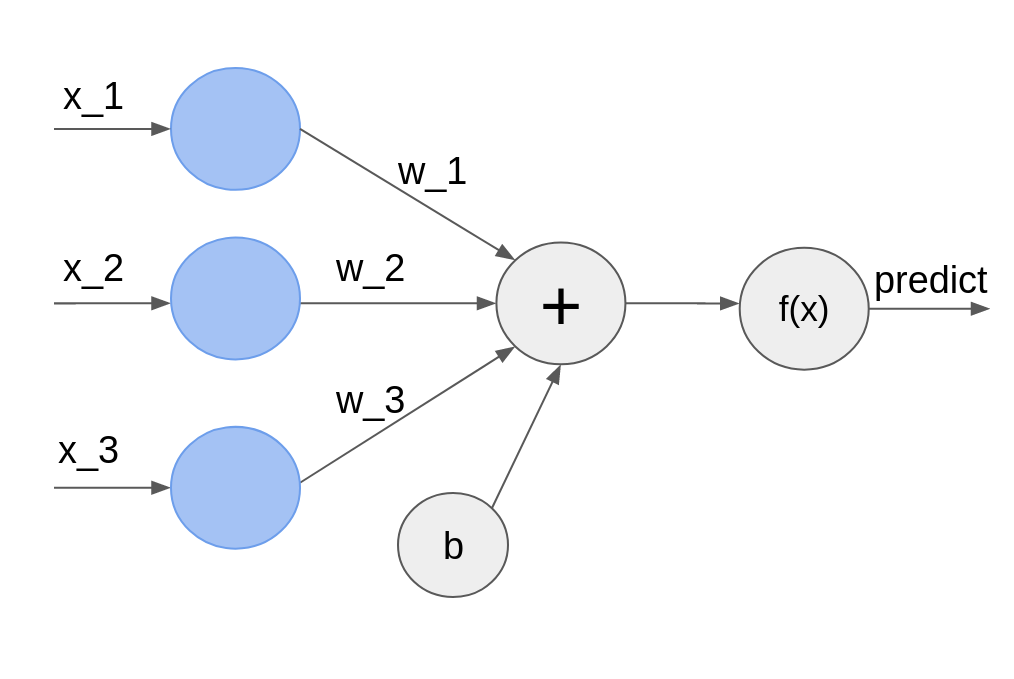

Таким образом наше предсказание теперь выглядит таким образом:

$$ predict = f(w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + b) = f(W ^ T \cdot x + b)$$

Пусть

$$x' = (x_1, x_2, ..., x_n, 1)$$

тогда

$$ predict = f(w_1 * x_1 + w_2 * x_2 + w_3 * x_3 + w_0) = f(W ^ T \cdot x')$$

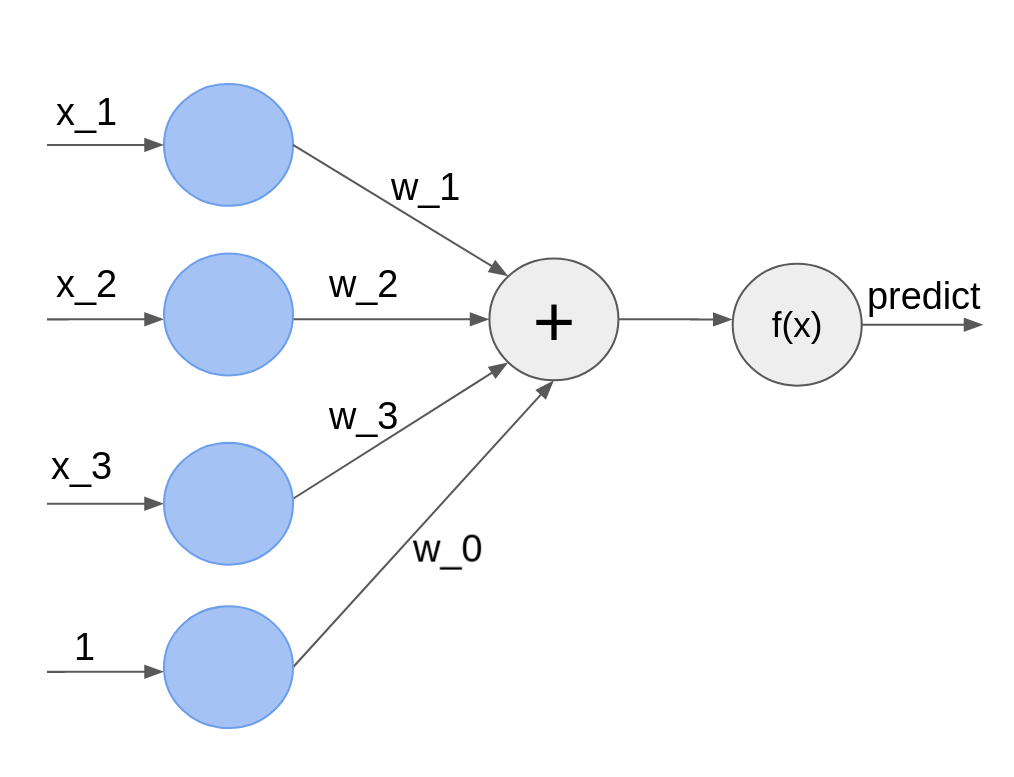

Кстати, в трехмерном случае это выглядит уже примерно следующим образом. Если увеличивать размерность, то мы уже не сможем это визуализировать. Так что будем применять название гиперплоскость.

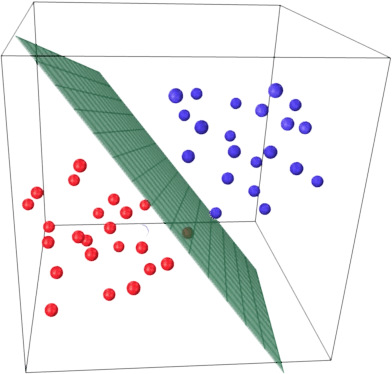

$$\text{sigmoid}(x)=\sigma(x)=\frac{1}{1+e^{-x}}$$

$$\frac{d}{dx}\sigma(x)=-\frac{1}{(1+e^{-x})^{2}}\cdot -e^{-x}=\frac{e^{-x}}{(1+e^{-x})^{2}}=\frac{1}{(1+e^{-x})}-\frac{1}{(1+e^{-x})^{2}}=\frac{1}{(1+e^{-x})}[1-\frac{1}{(1+e^{-x})}]=\sigma(x)[1-\sigma(x)]$$

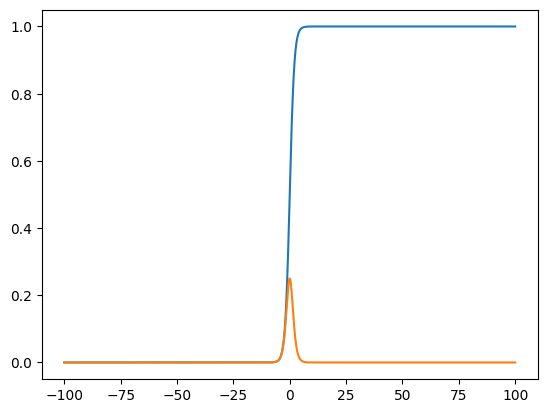

In [82]:
x = np.linspace(-100, 100, 10000)
sigma = lambda x: 1 / (1 + np.exp(-x))
plt.plot(x, sigma(x))
plt.plot(x, sigma(x)*(1-sigma(x)));

### N классов

Давайте добавим еще пару нейронов:

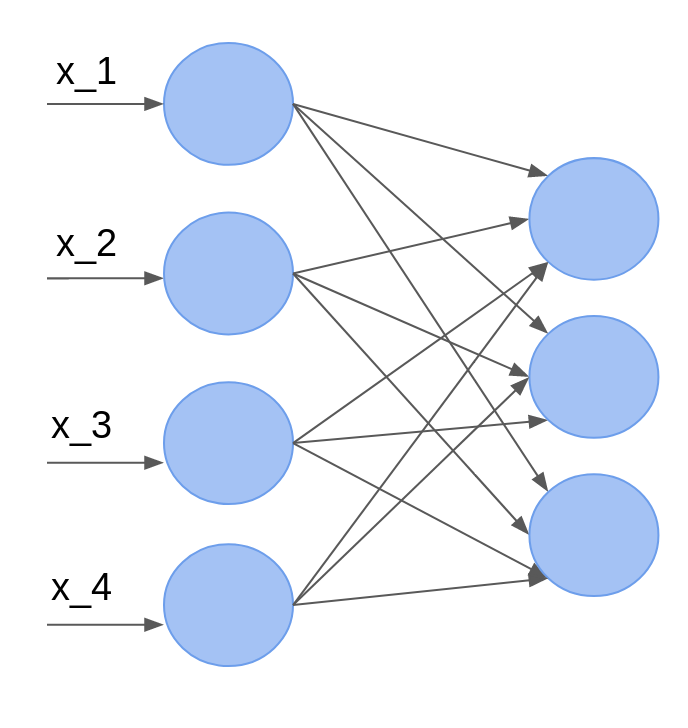

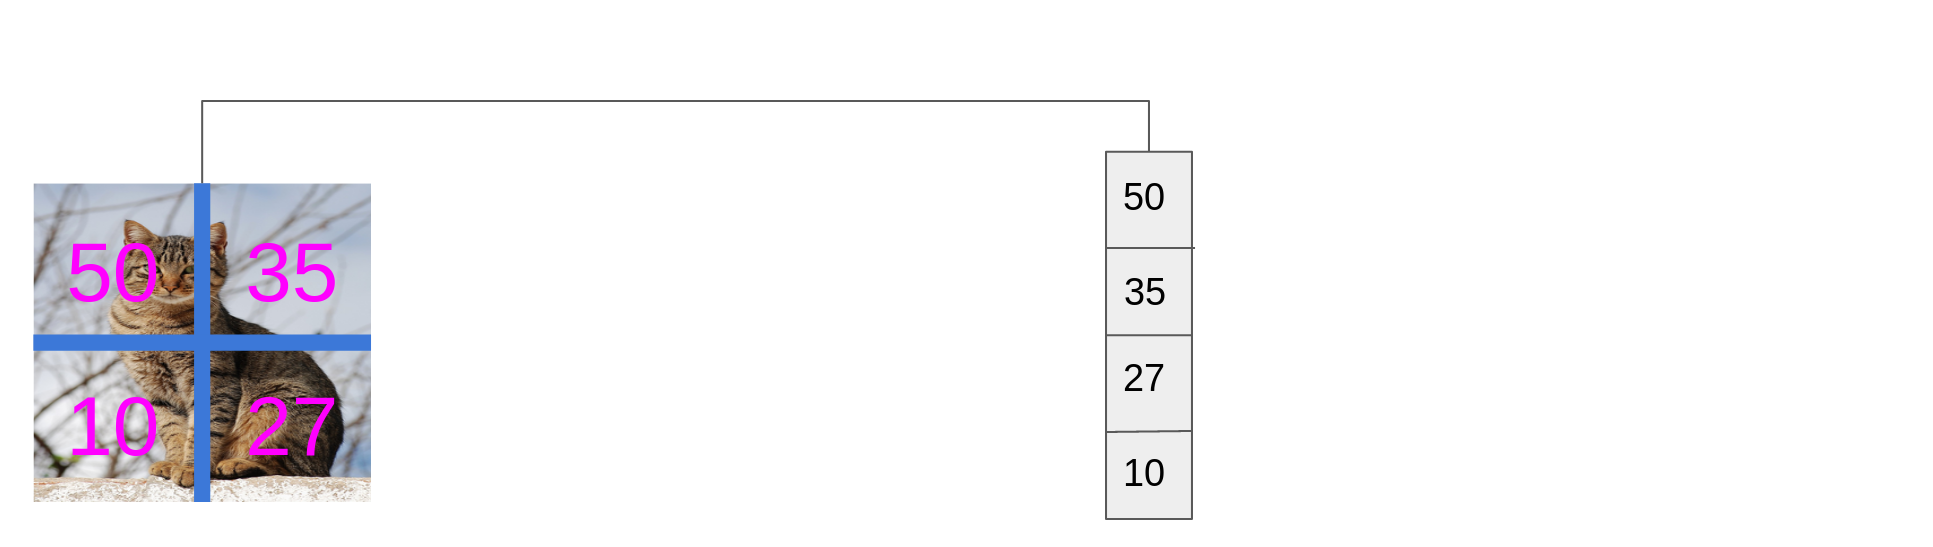

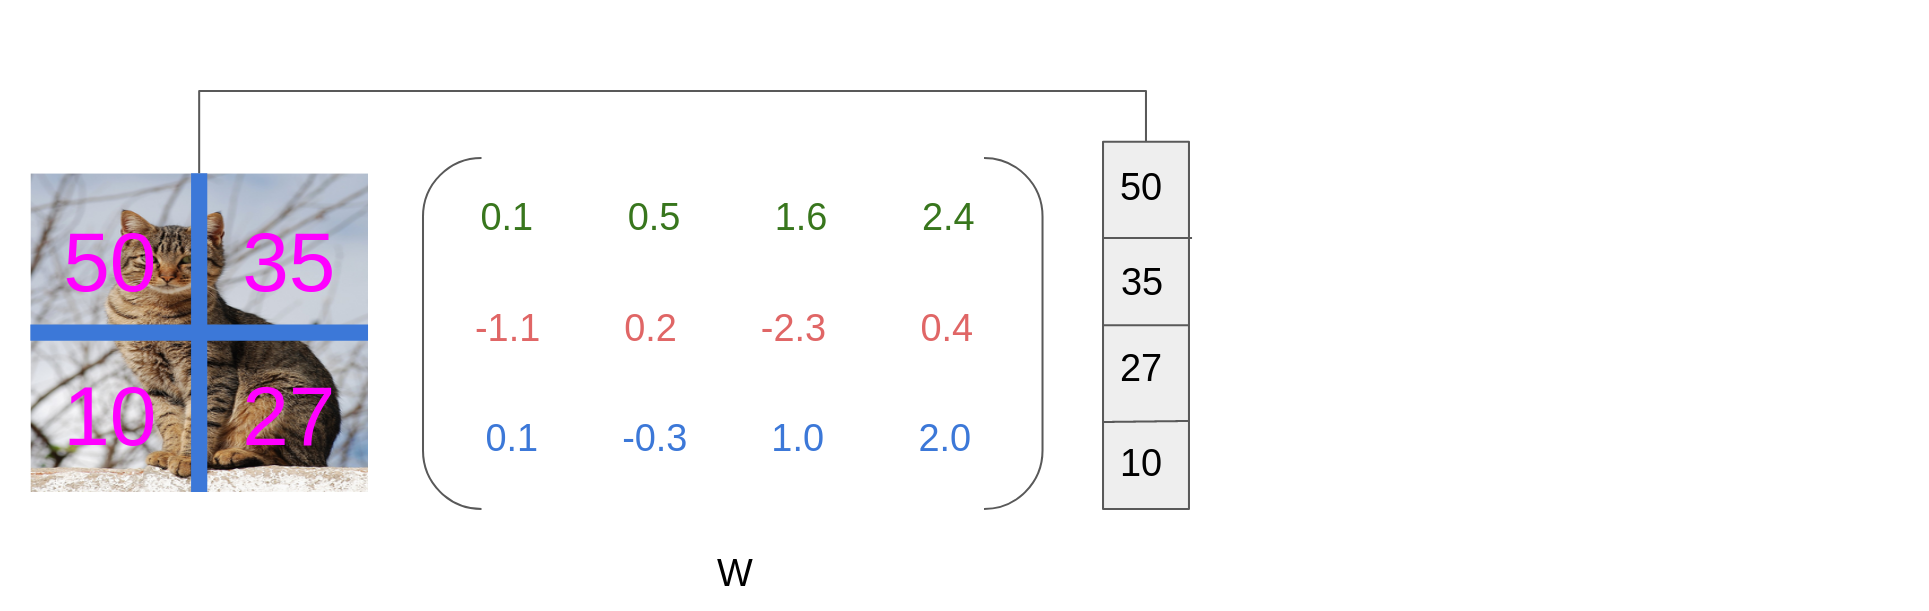

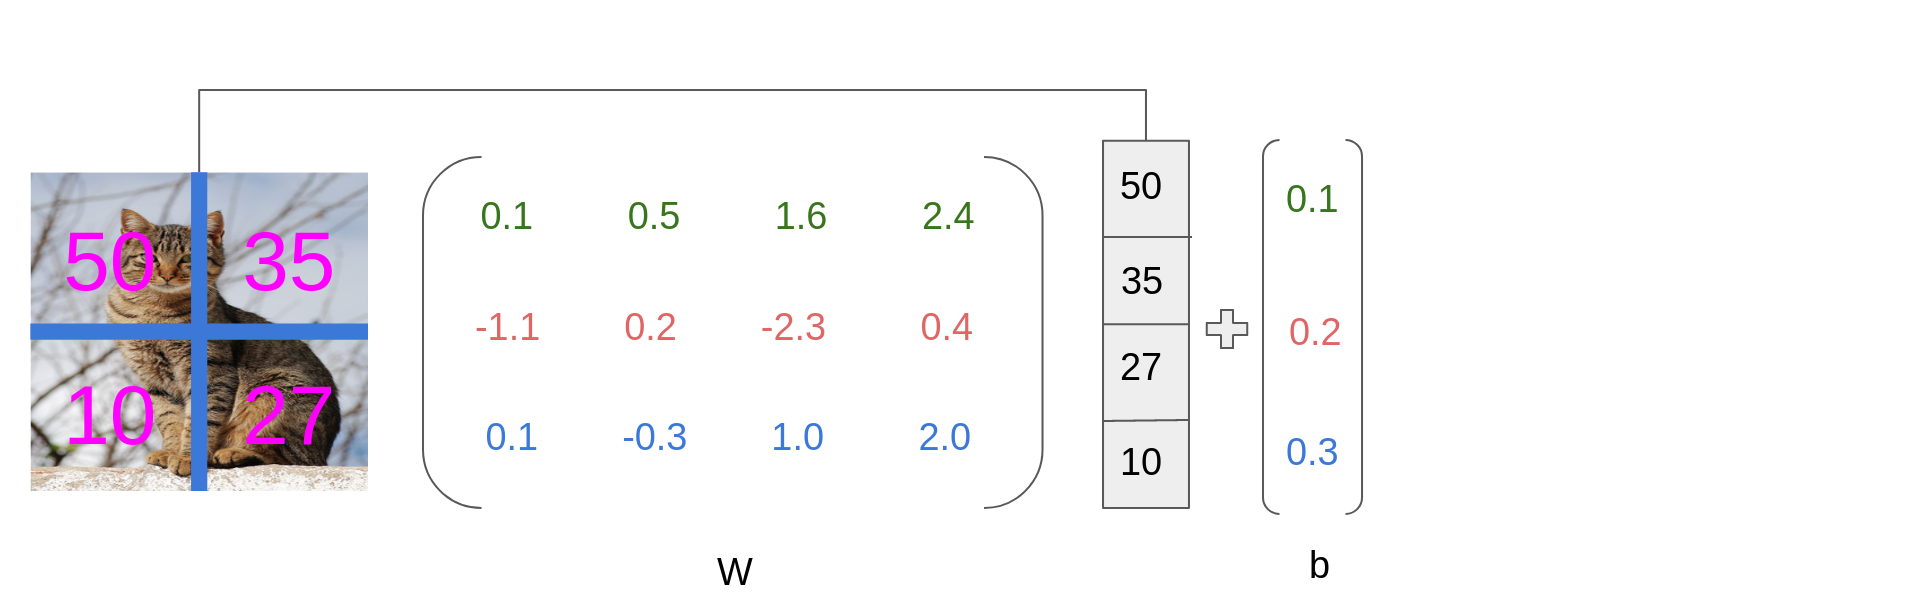

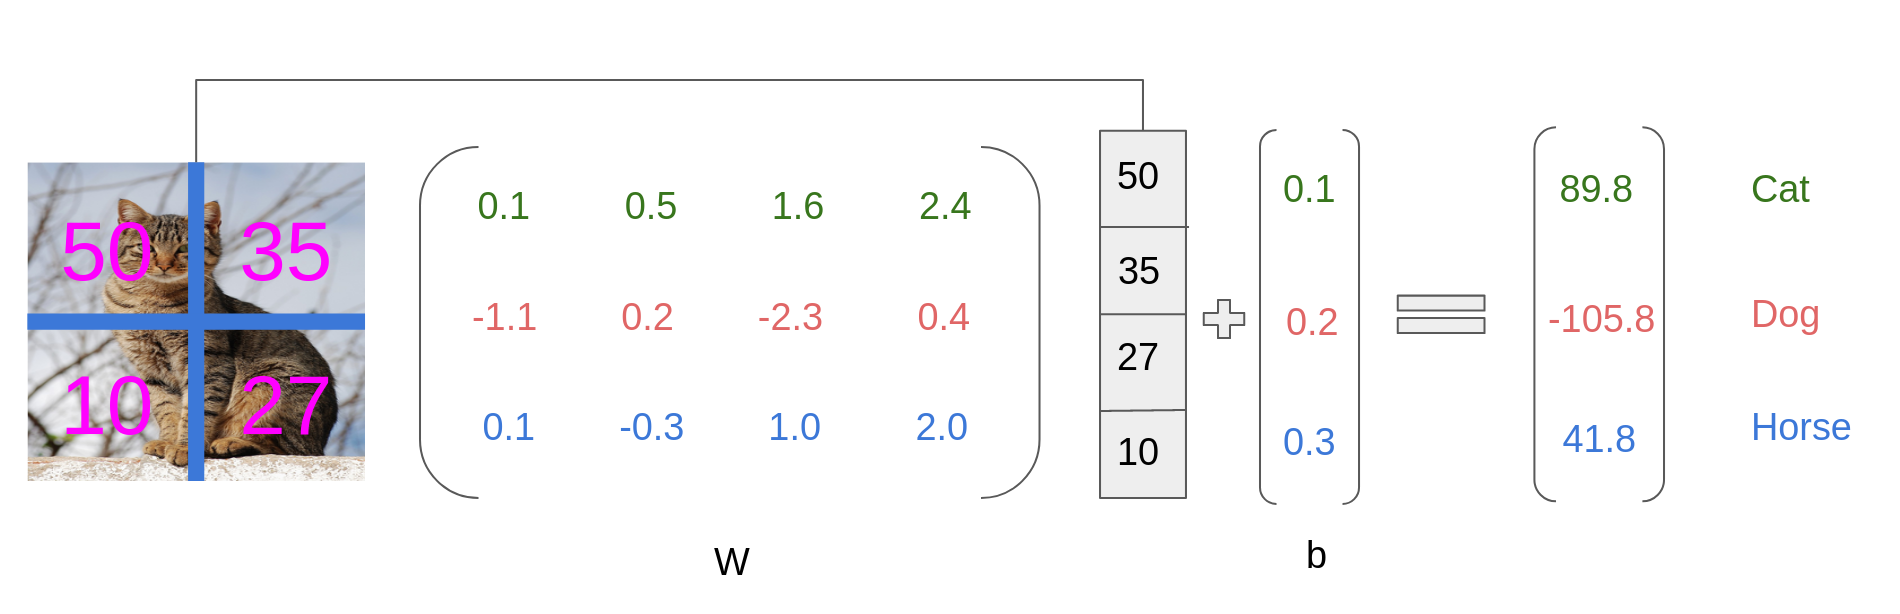

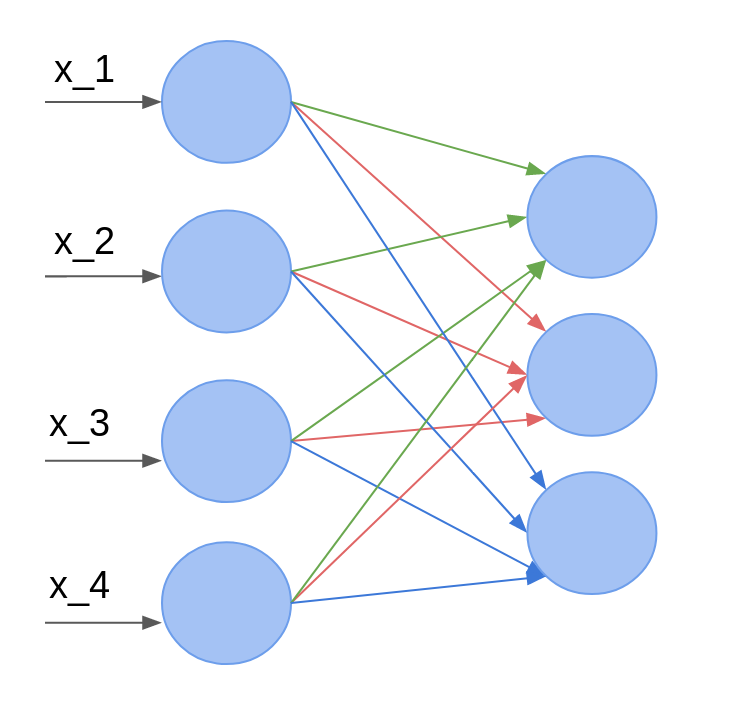

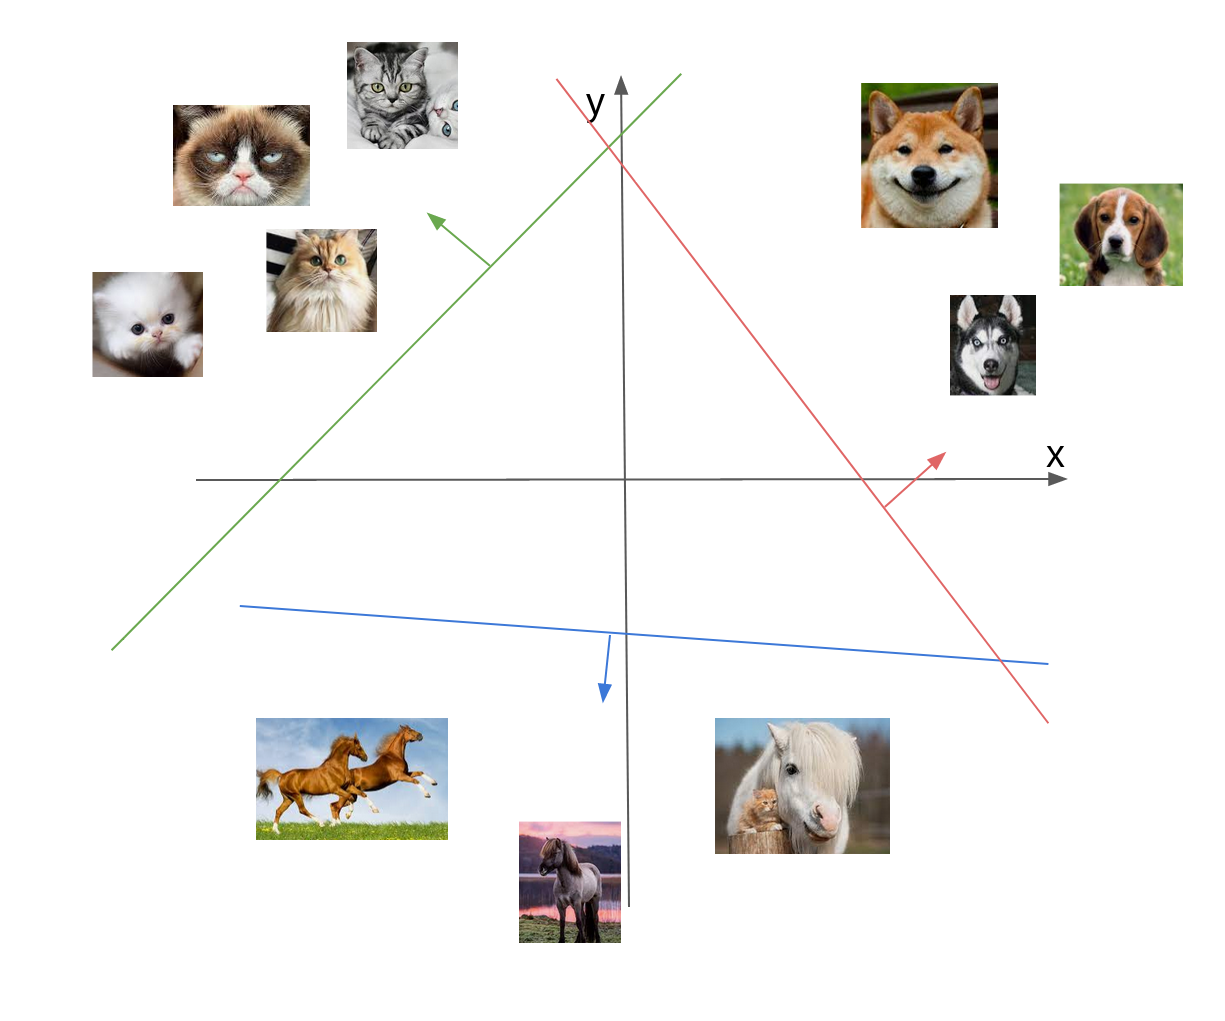

Крутую визуализацию можно найти [здесь](http://vision.stanford.edu/teaching/cs231n-demos/linear-classify/).

## Функция потерь


Функция потерь — функция, которая сводит результат предсказания модели к одному числу и показывает насколько хорошо (точнее насколько плохо) модель работает на данном примере.


Давайте еще раз взглянем на вот эту картинку:

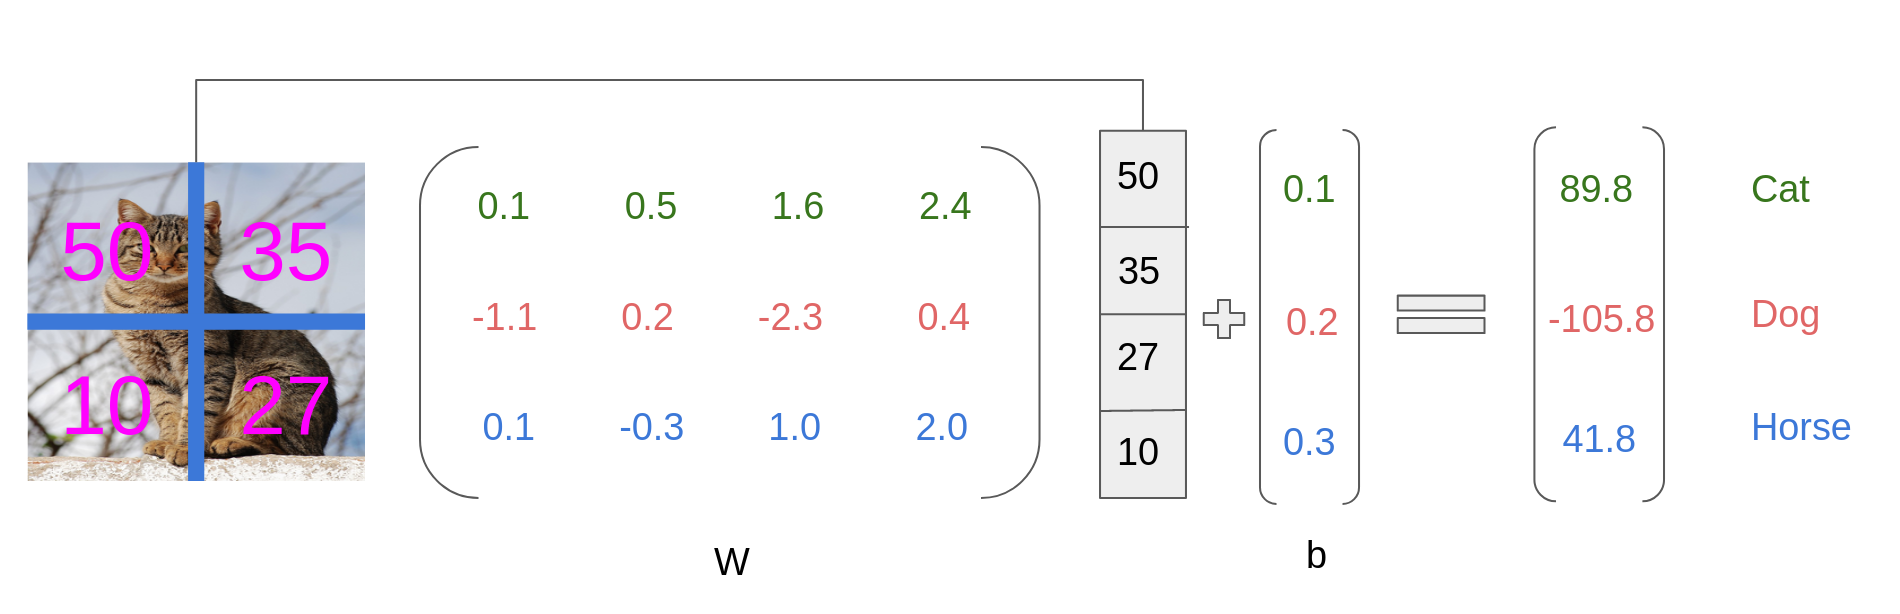

Введем функцию потерь следующим образом:
$$\hat{p}(x_{i})^{k}=\frac{e^{\hat{f}(x_{i})^{k}}}{\sum_{k}e^{\hat{f}(x_{i})^{k}}}\quad \sum_{k}{\hat{p}(x_{i})^{k}} = \text{?}$$

$$L = -\sum_{i=1}^{N}\sum_{k=1}^{K}p_{i}^{k}\log{\hat{p}(x_{i})^{k}} =
-\sum_{i=1}^{N}\sum_{k=1}^{K}p_{i}^{k} (\hat{f}(x_{i})^{k}-\log{\sum_{\hat{k}}e^{\hat{f}(x_{i})^{\hat{k}}}})$$


$$-\sum_{i=1}^{N}\sum_{k=1}^{K}p_{i}^{k}\log\hat{p}(x_{i})^{k}=-\sum_{i=1}^{N}\sum_{k=1}^{K}p_{i}^{k}\log\frac{1}{K}=\sum_{i=1}^{N}\log{K}=N\cdot\log{K}$$
$$-\sum_{i=1}^{N}\sum_{k=1}^{K}p_{i}^{k}\log\hat{p}(x_{i})^{k}=-\sum_{i=1}^{N}\log{1}=0$$

In [94]:
y_pred = np.array([[10, -20, 40], [89.8, -105.8, 41.8]])
y_true = np.array([2, 0])

def sigmoid(x):
    x = np.exp(x)
    return x / np.sum(x, axis=1)[:,None]

def celoss(labels, probs):
    # use np.take_along_axis
    probs = np.take_along_axis(probs, labels[:,None], axis=1)
    return -np.sum(np.log(probs))
probs = sigmoid(y_pred)
celoss(y_true, probs)

9.348077867344255e-14

$$\hat{p}(x_{i})=\frac{e^{\hat{f}(x_{i})}}{\sum_{i}e^{\hat{f}(x_{i})}}$$
$$\hat{f}(x_{i}) ⇒ \alpha\cdot f(x_{i})$$

То есть решение не единственно! Давайте добавим так называемый регуляризационный лосс:

$$ L(W) = \frac{1}{N} \sum_{i=1}^N L(f(x_i), y_i) + \lambda * R(W),$$

где, R может быть L2 лоссом:

$$R(W) = \sum_{i} \sum_{j} W_{ij}^2$$

или L1:

$$R(W) = \sum_{i} \sum_{j} |W_{ij}|$$

Зачум нужна регуляризация?

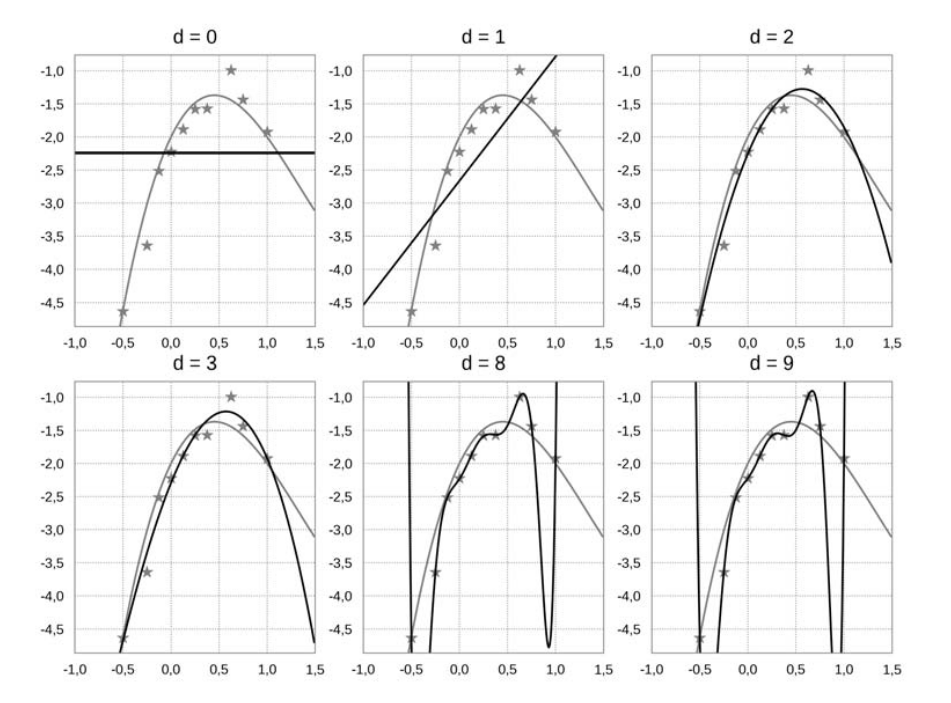

Аппроксимация многочлена $f(x) = x^3 − 4x^2 + 3x − 2$ по десяти точкам
с нормально распределенным шумом многочленами разной степени.

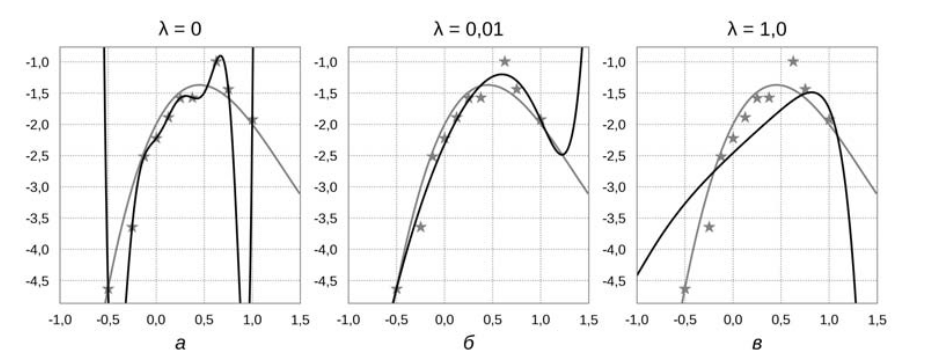

Аппроксимация многочлена $f(x) = x^3 − 4x^2 + 3x − 2$ по десяти точкам
с нормально распределенным шумом многочленами степени 9 с регуляризатором $\frac λ 2 ∥w∥^2$
для разных значений λ: а — $λ = 0$; б — $λ = 0,01$; в — $λ = 1$.

## Многослойные нейронные сети

Давайте вернемся к нашему линейному классификатору.
Что будет, если данные не разделимы линейно?
Как, например, здесь:

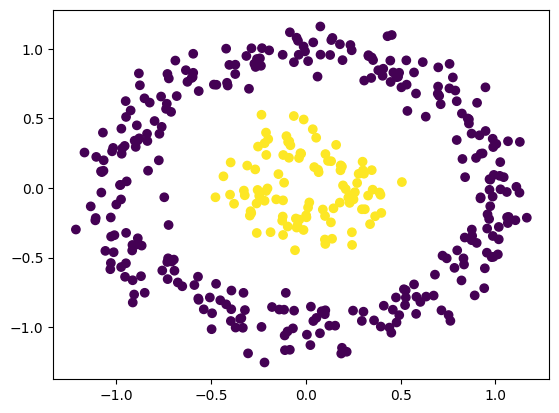

In [106]:
from sklearn.datasets import make_circles
X, labels = make_circles(n_samples=(300, 100), factor=0.3, noise=0.1)
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()

Как бы мы не крутили нашу линию, от этого не получится научиться классифицировать данные лучше. Нам нужно вытянуть какие-то фичи из данных, возможно попасть в какое-то новое пространство, где такая задача будет линейно разрешима. Например, если перевести наши точки в полярные координаты, то уже можем разделить их линейно.

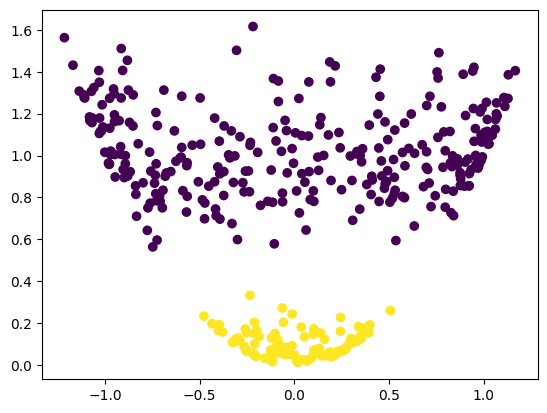

In [108]:
plt.scatter(X[:,0], X[:,0]**2 + X[:,1]**2, c=labels);

На этой идее основаны многослойные нейронные сети. Сначала идет полносвязнй слой, после которого применяется некая функция активации (обязательно ниленейная и дифференцируемая), после чего опять идет полносвязный слой и т.д.  

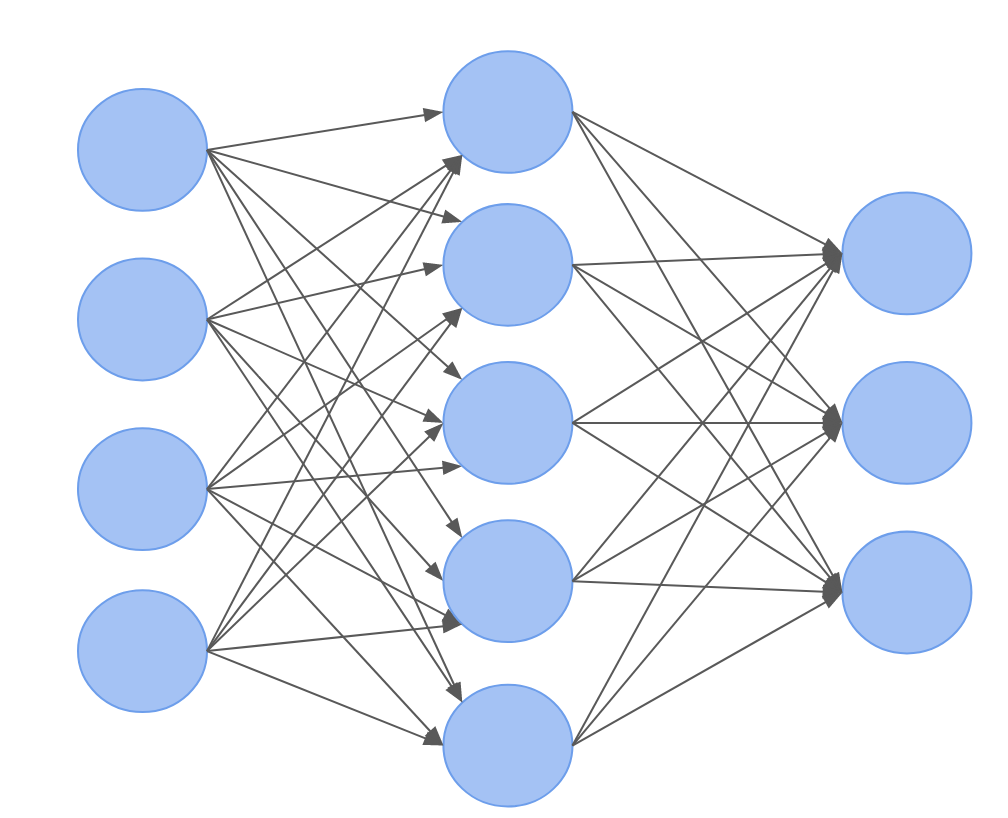

Когда мы рассматривали однослойную нейронную сеть, то у нас была следующая функция:

$ f = f(W, x) = W^T \cdot x $.

Если мы попробуем наложить еще один слой без использования нелинейной функции активации, то у нас получится следующее:

$ f_2 = f(W_2, f(W, x)) $

что по-сути превратится в матричное перемножение $ W_2 и W $. И опять получится линейная сеть, даже если мы сделаем ее очень глубокой.

Поэтому добавляется функция активации. Ниже перечислены самые популярные функции активации:

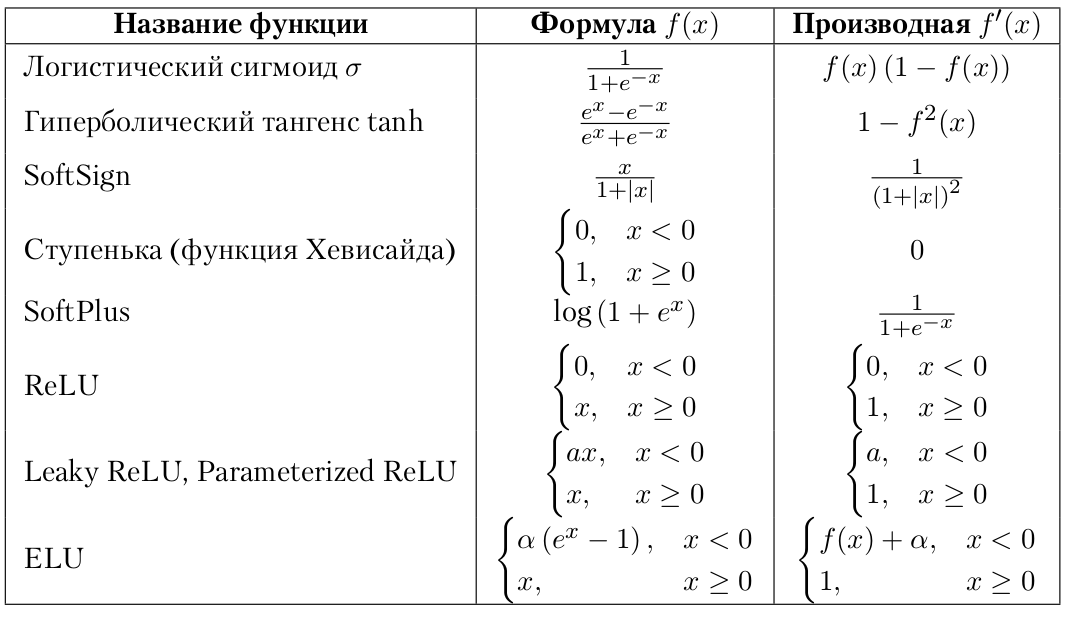

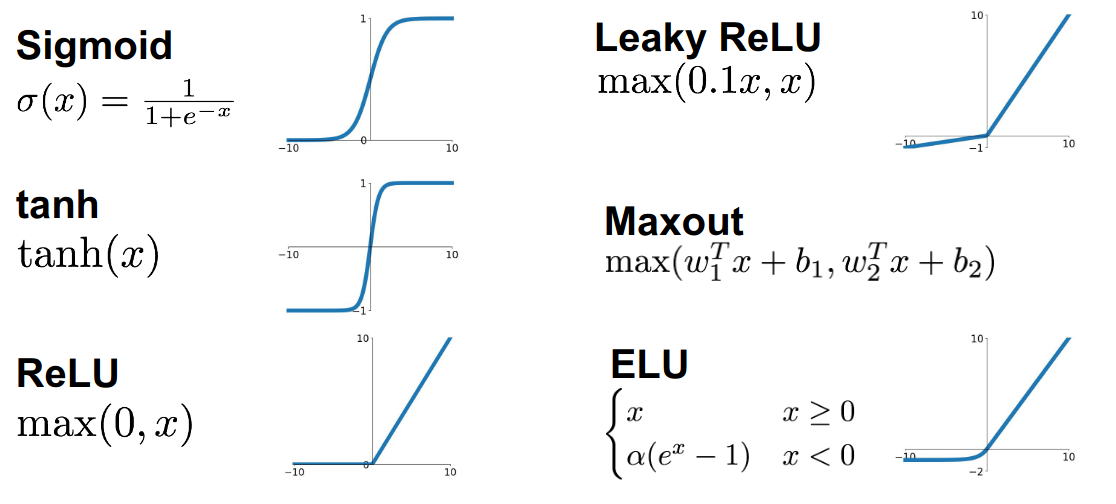

## Оптимизация

Выше мы говорили о том, что чем меньше Loss, тем лучше работает наш классификатор. Набор данных у нас зафиксирован перед началом обучения. Поэтому нам надо каким-то образом подобрать веса так, чтобы Loss был минимальным. <br>
Нaм на помощь спешит производная и градиент. Производная укажет нам направление, куда мы должны двигаться, чтобы достичь минимума. Точнее против какого направления нам нужно двигаться.


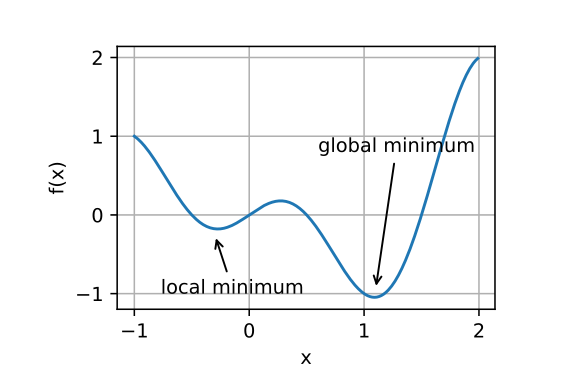

Производную можно вычислить двумя путями:

Аналитически и приближенно.

Аналитически бывает достаточно сложно вычислить производную. Особенно в какой-нибудь глубокой сети.

Также мы можем вычислить по формуле:


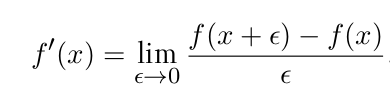

Но это очень медленно... Особо когда мы находимся не в двумерном, а в многомерном пространстве. Там необходимо вычислять градиент по всем направлениям.

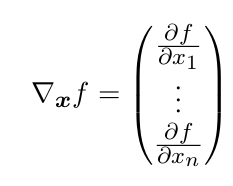

А у нас размерность пространства равна количеству всех обучаемых параметров. Каким же образом нам можно вычислить градиент? <br>
На помощь приходит цепное правило.

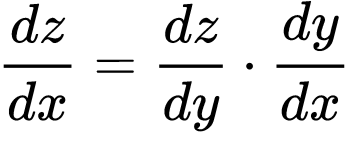

Давайте рассмотрим на примере, зачем оно нужно. Пусть задана следующая функция:

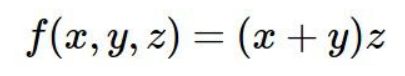

Тогда мы можем представить ее в следующем виде:

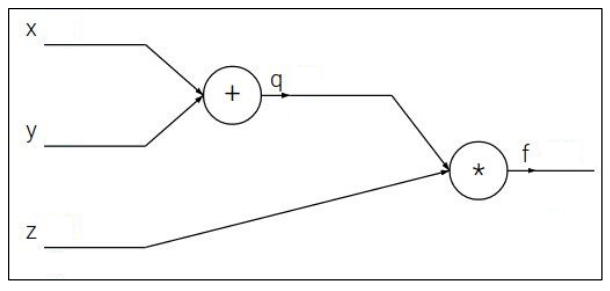

Посчитаем градиент в конкретной точке: (-2, 5, -4)

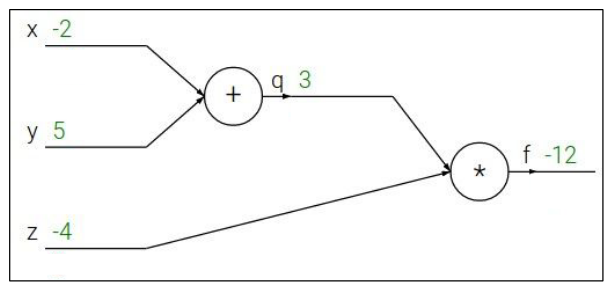

Обратим внимание, что:

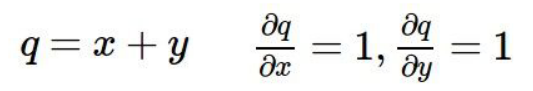

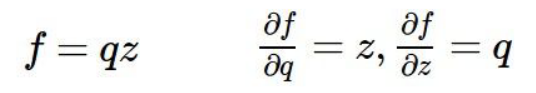

Нам необходимо найти:

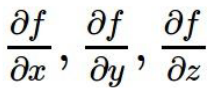

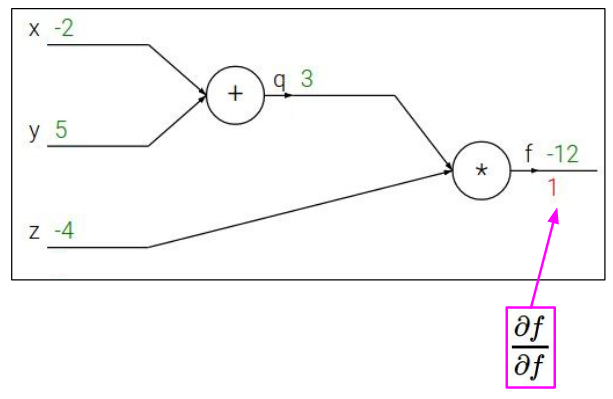

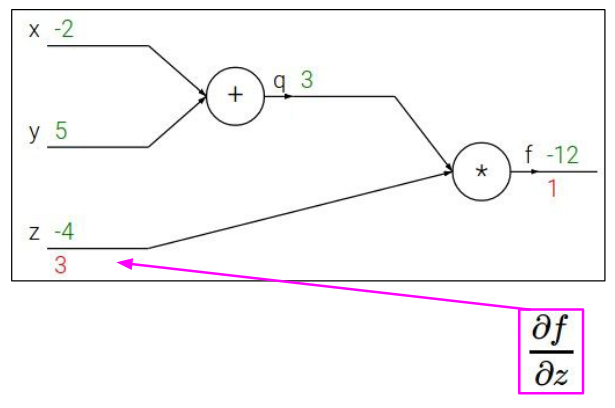

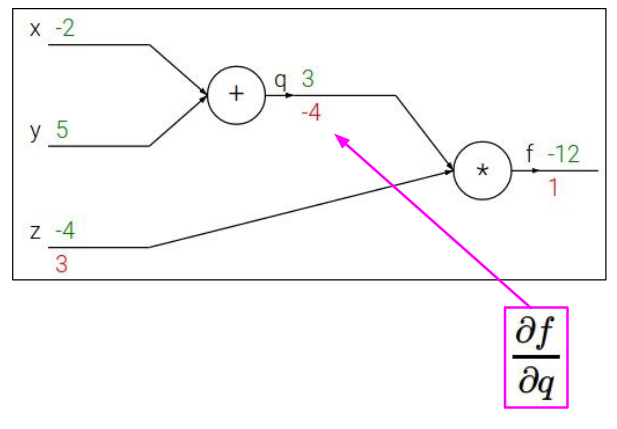

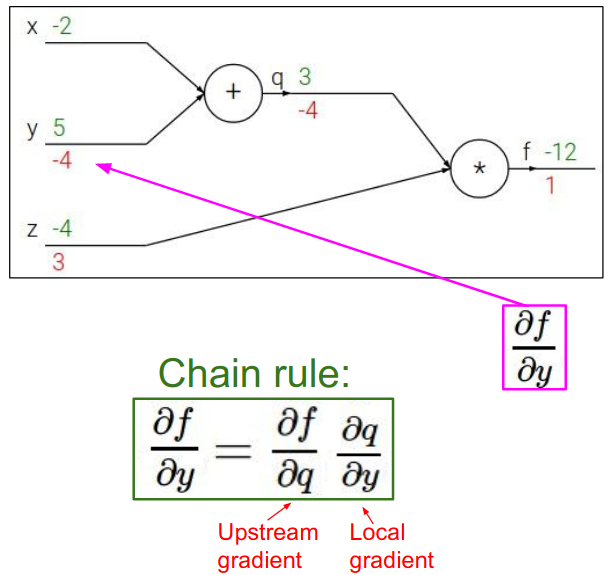

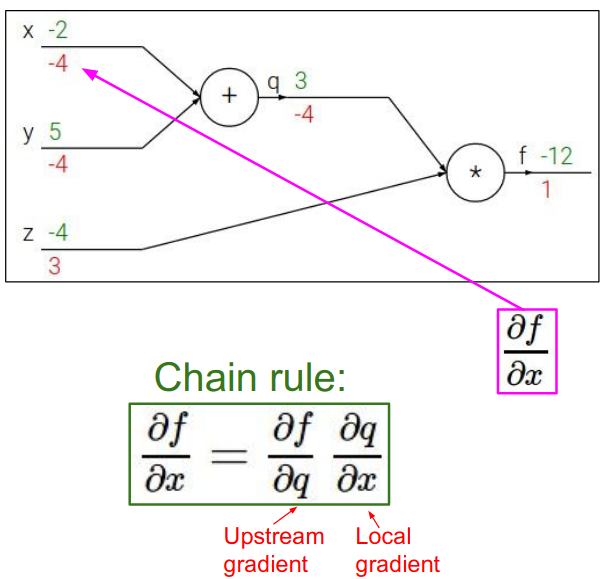

Давайте посмотрим, что происходит в одном узле с определенной функцией.

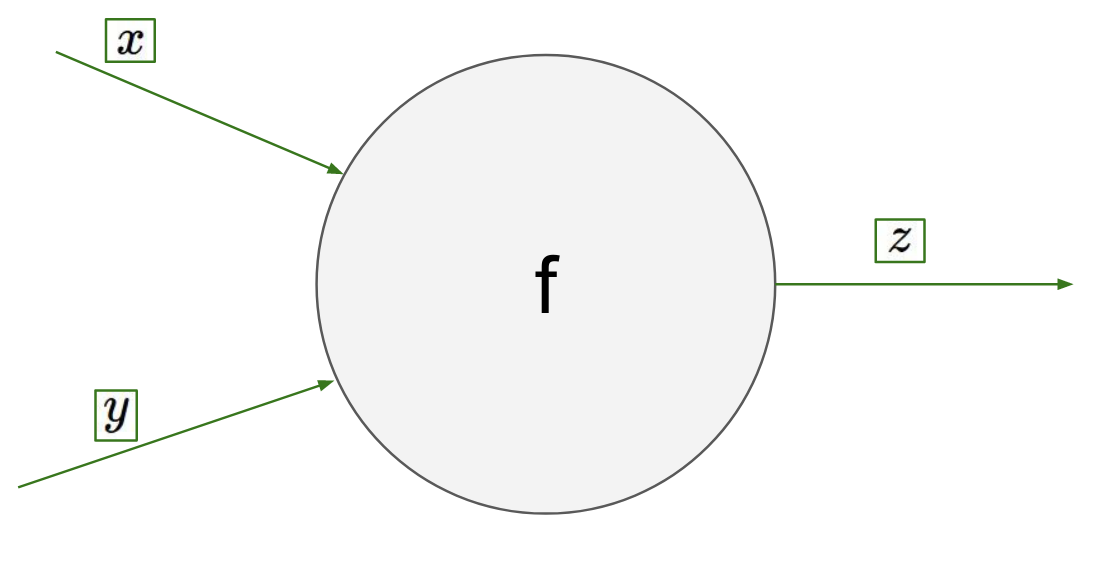

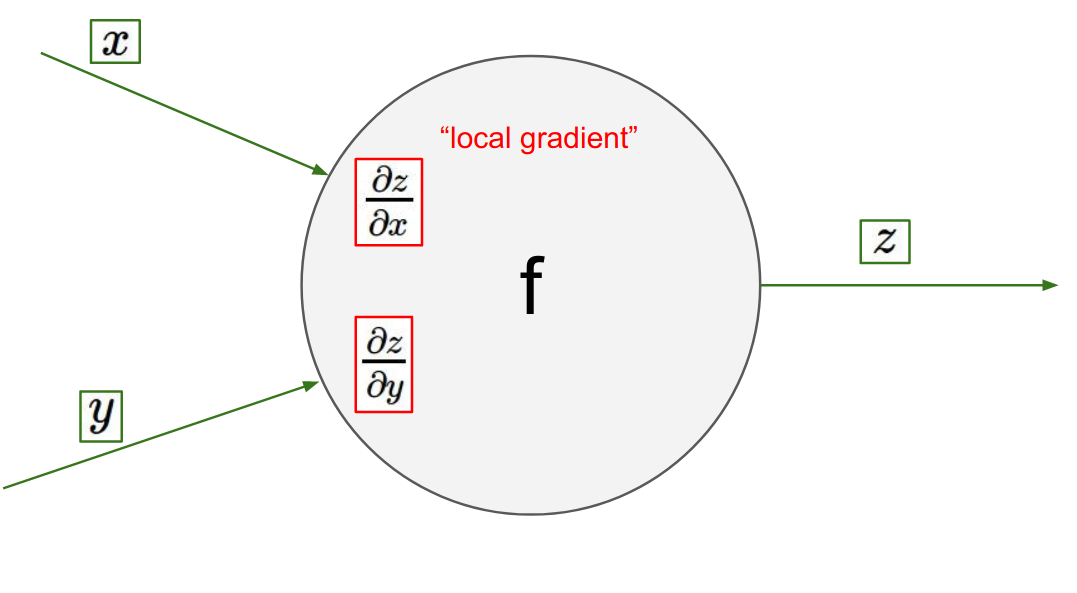

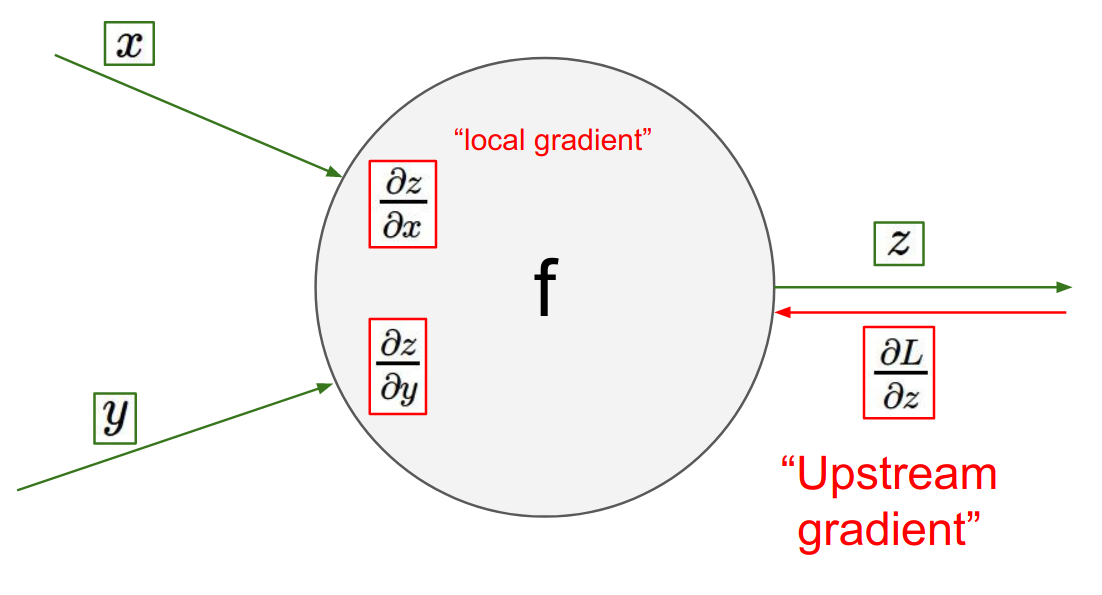

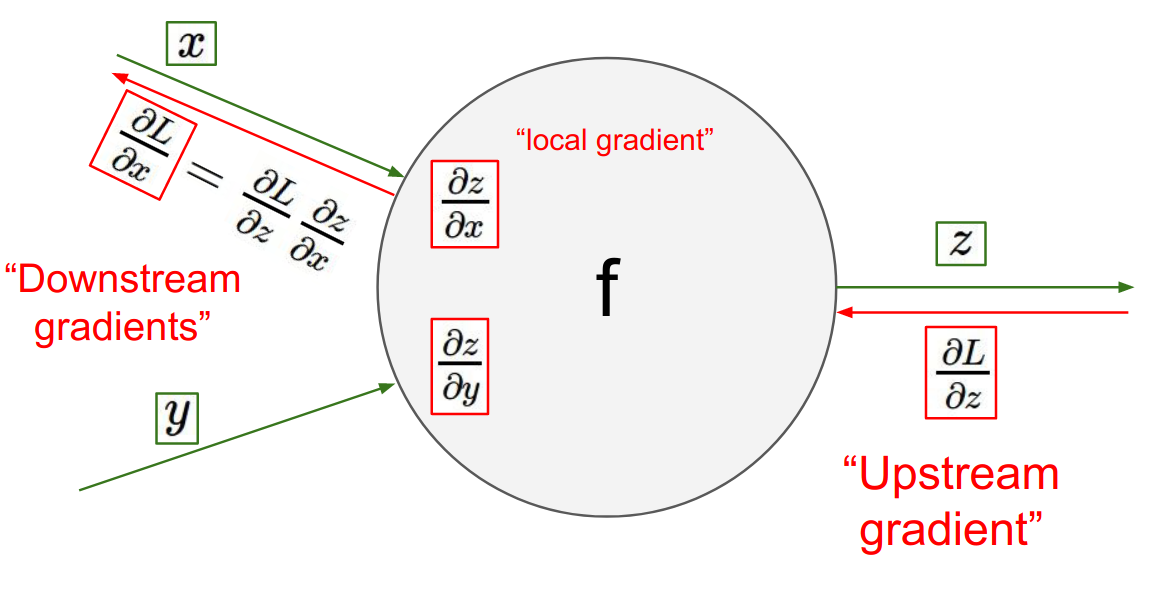

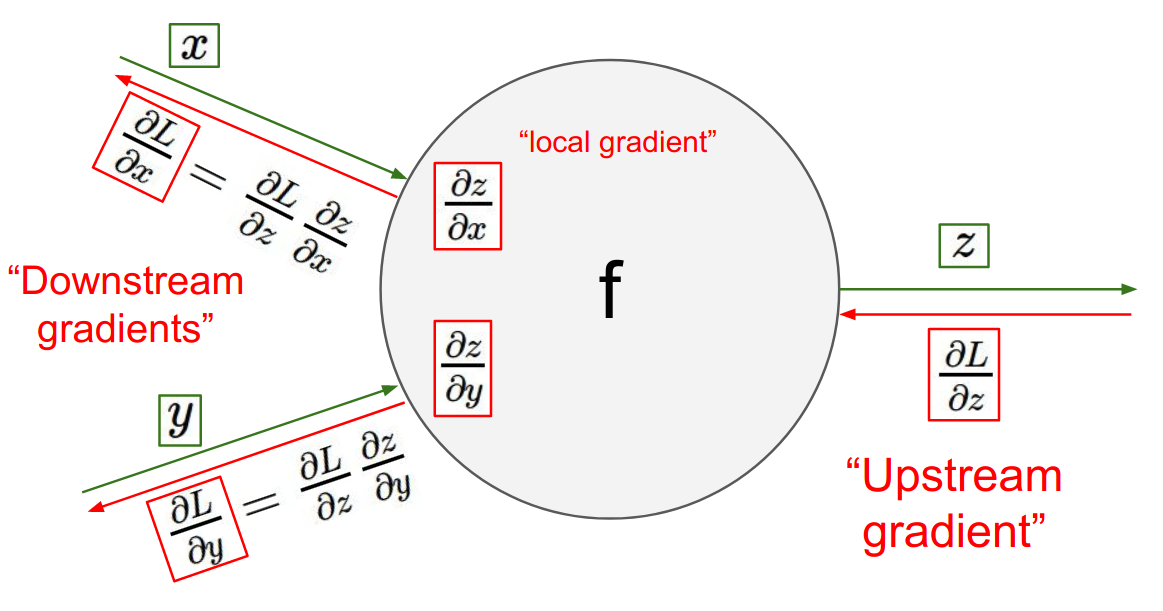

Теперь, когда мы умеем вычислять градиенты, то мы можем начать передвигаться по этой сложной поверхности в N-мерном пространстве. Но как это делать?


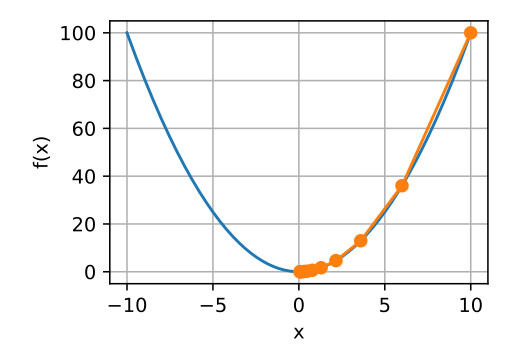

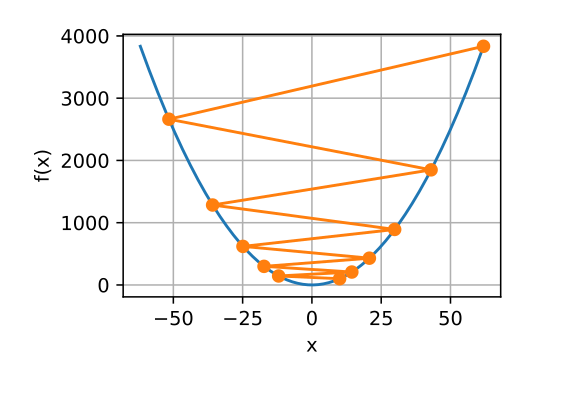

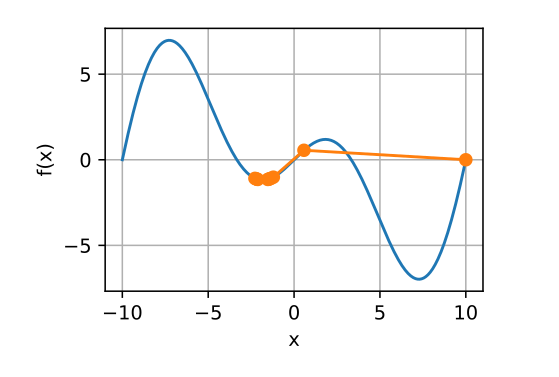

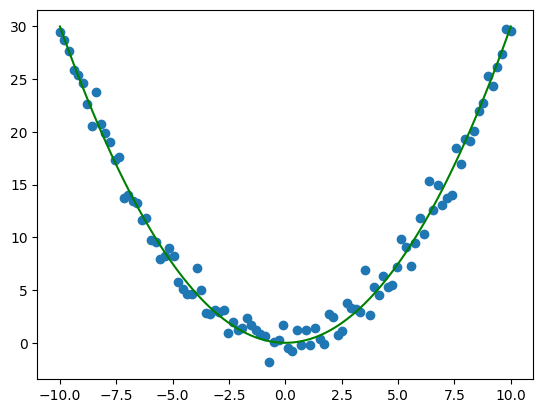

In [112]:
def function(x):
    return 0.3*x**2

x = np.linspace(-10, 10, 100)[:,None]
y = function(x[:,0]) + np.random.randn(x.shape[0])
plt.scatter(x, y)
plt.plot(x[:,0], function(x[:,0]), c='green');

In [151]:
w = -0.5
learning_rate = 0.0003
diff = 1
x_ = x**2
history = [w]
while diff > 0.0001:
  grad = 2 * np.sum((x_[:,0]*w-y)*x_[:,0]) / x.shape[0]
  w_new = w - learning_rate * grad
  diff = abs(w_new - w)
  w = w_new
  history.append(w)
history

[-0.5,
 0.4972451876957613,
 0.24912255933875727,
 0.3108574661223537,
 0.29549732448264926,
 0.2993190513383942,
 0.29836817494008233,
 0.2986047606404726,
 0.29854589621421435]

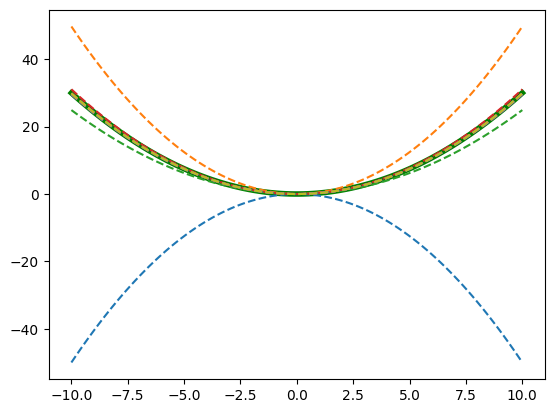

In [153]:
plt.plot(x[:,0], function(x[:,0]), c='green', linewidth=4)
for w in history:
    plt.plot(x[:,0], w*x[:,0]**2, '--')

## Обучающая выборка


Обучающая выборка для задачи классификации является набором картинок и соответствющих им названий классов.

Например, один из тренировочных датасетов [Fasion MNIST](https://github.com/zalandoresearch/fashion-mnist) содержит в себе 70 тысяч размеченных картинок.

Всего там 10 классов:



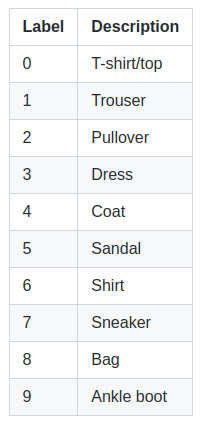

### Разделение на тренировочную и тестовую выборку

Когда мы загрузим картинки, что же нам с ними делать дальше?

* Пытаться подобрать веса таким образом, чтобы модель лучше всего работала на всех 70к изображений?
Это плохая идея. В таком случае модель может переобучиться. И тогда на новых данных она будет работать намного хуже. Никогда так не делайте!

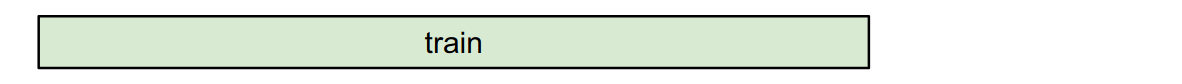

* Авторы датасета за нас уже разбили его на тренировочную и тестовую части. В наших же датасетах нам придется делать это самим.



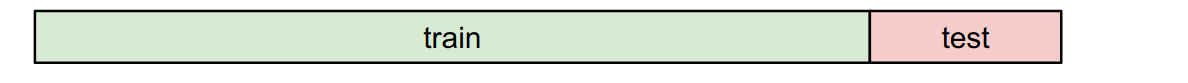

* Разбить на 3 части: тренировочную, валидационную и тестовую. Мы будем подбирать параметры по валидационной части и тестировать уже обученную модель на тестовых данных.

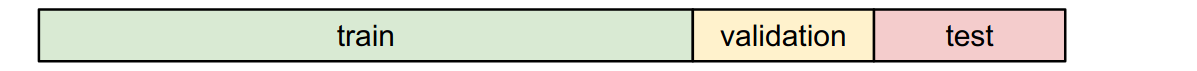

* Кросс-валидация. Это когда мы делаем N разбиений и запускаем N экспериментов. Обычно полезно на очень маленьких датасетах, чтобы проверить, не переобучились ли мы. Используется не очень часто, так как это довольно затратно.


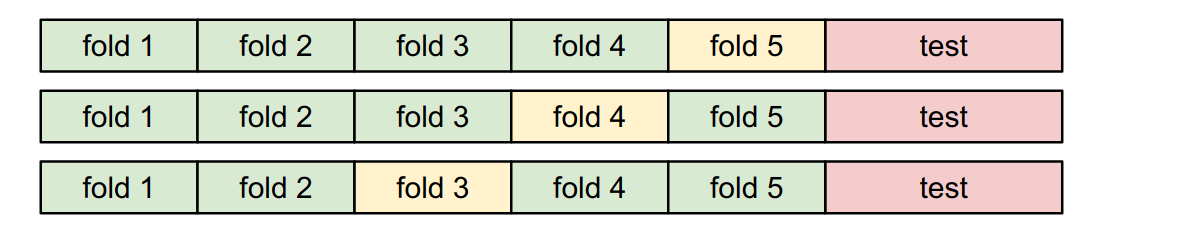

## Список источников

* [Глубокое обучение. Бенджио Иошуа, Гудфеллоу Ян](https://www.ozon.ru/product/glubokoe-obuchenie-141754606/?sh=X_FjS5jW)
* Бесплатная [онлайн версия](https://www.deeplearningbook.org/) книги выше, но только на английском.
* [Николенко, Кадурин, Архангельская: Глубокое обучение. Погружение в мир нейронных сетей](https://www.labirint.ru/books/622166/)
* Знаменитый курс [cs231n](http://cs231n.stanford.edu/)
* Если вызывают затруднение расчеты градиентов, то очень рекоммендую помучаться в заданием тут https://github.com/yandexdataschool/Practical_DL/blob/spring23/week01_backprop/backprop.ipynb, там же можете посмотреть слайды семинаров.